### Task:
- Use ML to apply `Linear Regression` or `Classification` on the `lifestyle` dataset.

## Linear Regression

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Local Version:
life = pd.read_csv('x:REDACTED\04 - Regression Project\lifestyle.csv') # change accordingly

# Google Colab Version:
# from google.colab import files
# uploaded = files.upload()
# life = pd.read_csv('lifestyle.csv')

Saving lifestyle.csv to lifestyle.csv


In [3]:
life.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260000e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020000e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.080000e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.990000e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.260000e+19,Low


In [4]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6569 entries, 0 to 6568
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             6569 non-null   float64
 1   Gender                          6569 non-null   object 
 2   Weight (kg)                     6569 non-null   float64
 3   Height (m)                      6569 non-null   float64
 4   Max_BPM                         6569 non-null   float64
 5   Avg_BPM                         6569 non-null   float64
 6   Resting_BPM                     6569 non-null   float64
 7   Session_Duration (hours)        6569 non-null   float64
 8   Calories_Burned                 6569 non-null   float64
 9   Workout_Type                    6569 non-null   object 
 10  Fat_Percentage                  6569 non-null   float64
 11  Water_Intake (liters)           6569 non-null   float64
 12  Workout_Frequency (days/week)   65

In [5]:
life.isnull().sum()
# hence, no null data

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [6]:
# Features (all except target)
X = life.drop('Calories_Burned', axis=1)

# Label (target variable)
y = life['Calories_Burned']

# Encode categorical columns (since Linear Regression needs numeric data)
X = pd.get_dummies(X, drop_first=True)

- `pd.get_dummies()` automatically converts text columns like "Gender" or "Workout_Type" into numeric one-hot encoded values.

- `drop_first=True` avoids dummy variable traps (redundant columns).

We can later scale(normalize) the features with `MinMaxScaler()` before fitting our model.

### The train-test split is a method used to evaluate the performance of a machine learning model by dividing the dataset into two distinct parts: the training set and the testing set.

- X, y: The features (X) and target labels (y) of the dataset.
- test_size=0.3: The proportion of the dataset to include in the testing set, in this case, 30%.
- random_state=42: Ensures reproducibility. It controls the random splitting of the data. Using the same random state will always generate the same split, making it easier to compare results.

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression** is a statistical model that predicts a continuous target variable (e.g., salary, price, or temperature) based on one or more input features (e.g., years of experience, house size, or age). It establishes a linear relationship between the input features and the target variable by fitting a straight line.

$y=b
0
​
 +b
1
​
 x$

- `y`: The target variable.
- `b_0`: The intercept of the line (where the line crosses the y-axis).
- `b_1`: The coefficient of the input feature (slope of the line).
- `x`: The feature variable.

During the training process, the model learns the optimal values for the intercept (`b_0`) and coefficients (`b_1`, `b_2`, ...) by minimizing the sum of squared errors between the predicted values and actual values.

The mean_squared_error (MSE) is a metric used to evaluate the performance of regression models. It measures the average squared difference between the actual and predicted values. Essentially, it tells us how close our model’s predictions are to the actual output values.

In [8]:
# Step 1:
# Creating a Linear Regression Model
model = LinearRegression()

# Step 2:
# Training the model
model.fit(X_train, y_train)

LinearRegression()

`.fit()` means “train the model”.

It calculates the best coefficients (weights) for each feature in X_train that best predict y_train (in this case, Calories_Burned).

After training, the model “learns” how each feature affects the target variable.

In [9]:
# Step 3:
# Predict based on test data
y_pred = model.predict(X_test)

`.predict()` uses the learned coefficients to estimate y values for new, unseen data (X_test).

`y_pred` will be a list of predicted calorie values.

In [10]:
# Step 4:
# Evaluating the model by calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", model.score(X_test, y_test))

Mean Squared Error: 276798.6215081812
Root Mean Squared Error: 526.1165474571021
R² Score: -0.0020366905227293675


- **MSE (Mean Squared Error)**: average of squared differences between actual and predicted values — lower is better.

- **RMSE (Root Mean Squared Error)**: the square root of MSE; gives an error measure in the same units as the target (Calories).

- **R² Score:** tells how well the model explains the variance in the target (1 = perfect fit, 0 = no relationship).

Since we’re predicting a continuous value (Calories_Burned), the best way to visualize is a **scatter plot** comparing actual vs predicted values.

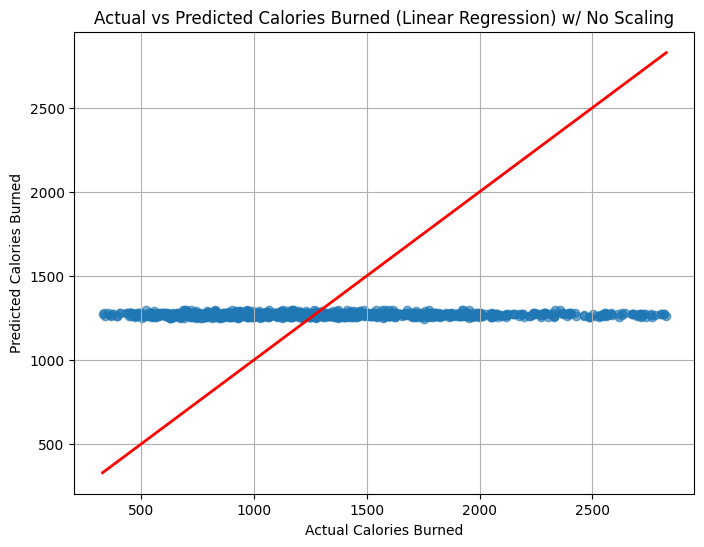

In [11]:
# Step 5:
# Visualize Predictions vs Actual Values

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs Predicted Calories Burned (Linear Regression) w/ No Scaling")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # ideal line
plt.grid(True)
plt.show()

### Normalize then apply Linear Regression

In [12]:
# Step 1: Initialize the scaler
scaler = MinMaxScaler()

# Step 2: Apply scaling only to the feature set (X)
# Fit the scaler on training data, then transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

`fit_transform()` → learns the min and max from training data, then scales it to a 0–1 range.

`transform()` → uses the same scaling on test data (to avoid “data leakage”).

Scaling the features ensures that large-valued columns (like “Calories” or “Height”) don’t dominate small-valued ones (like “BMI” or “Water_Intake”).

In [13]:
# Step 3: Train the model using the scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [14]:
# Step 4: Predict and Evaluate
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(X_test_scaled, y_test)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Squared Error: 7.701324357584634e-24
Root Mean Squared Error: 2.775126007514728e-12
R² Score: 1.0


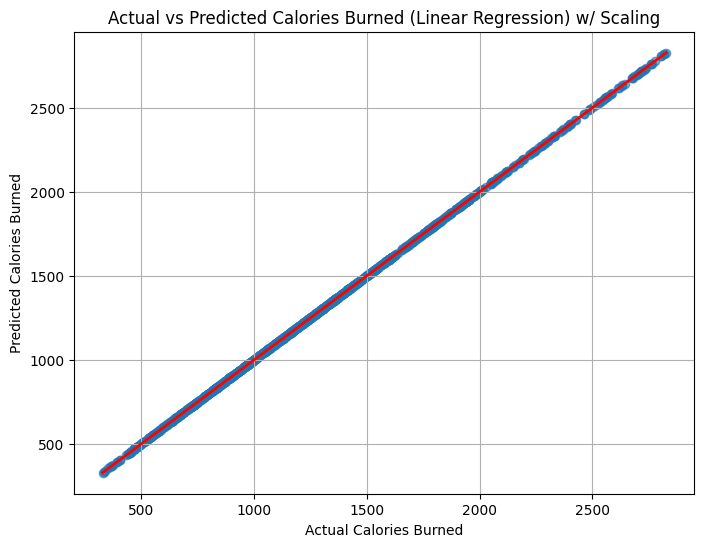

In [15]:
# Step 5: Visualize Predictions vs Actual Values

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs Predicted Calories Burned (Linear Regression) w/ Scaling")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # ideal line
plt.grid(True)
plt.show()

**Examining feature coefficients** is one of the best ways to interpret a Linear Regression model. It tells us how much each feature influences the target, assuming all others are held constant.

Since we used `pd.get_dummies()` earlier, the features are numeric and ready for inspection.

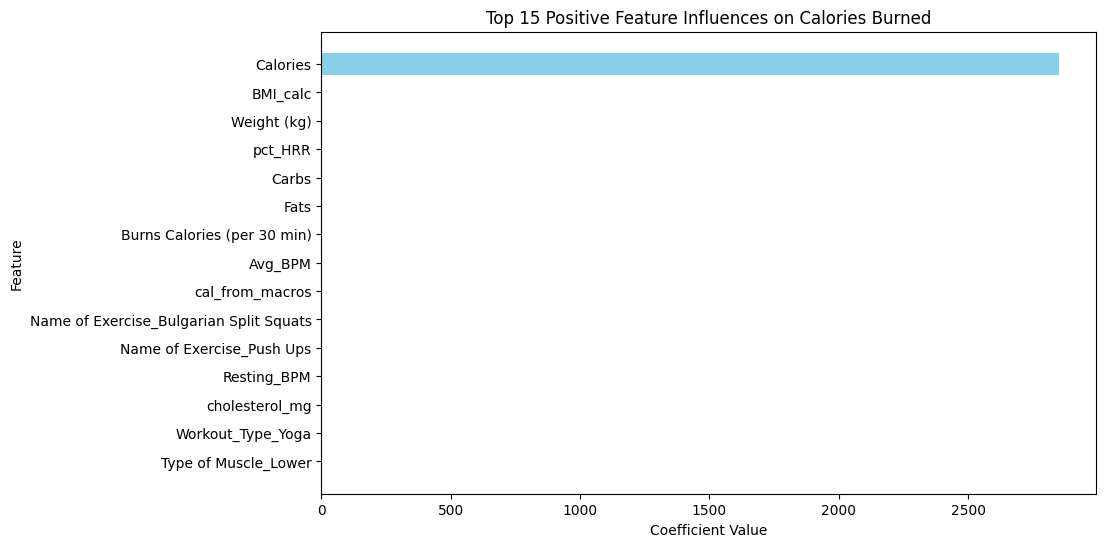

In [16]:
# Step 1: View Feature Coefficients

# Get feature names after one-hot encoding
feature_names = X.columns

# Retrieve coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Visualize top 15 features
top_features = coef_df.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 15 Positive Feature Influences on Calories Burned')
plt.gca().invert_yaxis()  # highest at top
plt.show()

- Coefficient → shows how much the target (Calories_Burned) changes when that feature increases by 1 unit.

    - Positive = increases calories burned.

    - Negative = decreases calories burned.

- Intercept → the baseline prediction when all features are zero (not usually meaningful after normalization, but useful to know).

Sorting helps us easily see which features are the most important drivers of the prediction.

## Logistic Regression (Classification)

In [17]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# 1) Prepare X (features) and y (labels)

# Target column
y = life['Burns_Calories_Bin']

# Features (everything except the target)
X = life.drop('Burns_Calories_Bin', axis=1)

# Convert categorical columns to numeric (for model compatibility)
X = pd.get_dummies(X, drop_first=True)

# Encode target labels (e.g. Low, Medium, High -> 0, 1, 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [19]:
# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (5255, 285) Test shape: (1314, 285)


In [20]:
# 3) Scale numeric features (fit on train only)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# 4) Create and Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# 5) Make Predictions and Check Accuracy
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy:, { round(acc,3)*100 }%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy:, 82.6%

Classification Report:
              precision    recall  f1-score   support

        High       0.78      0.78      0.78       323
         Low       0.84      0.89      0.86       316
      Medium       0.75      0.70      0.72       326
   Very High       0.92      0.92      0.92       349

    accuracy                           0.83      1314
   macro avg       0.82      0.82      0.82      1314
weighted avg       0.82      0.83      0.82      1314



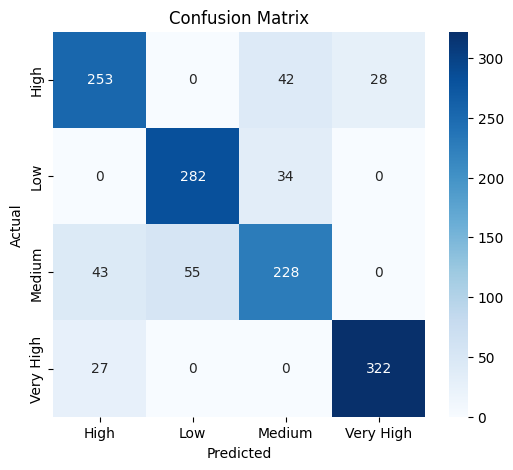

In [23]:
# 6) Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The target column `Burns_Calories_Bin` has more than two classes (e.g., “Low”, “Medium”, “High”), and by default, the **ROC** and **Precision–Recall** curves in scikit-learn only support binary classification unless we modify them slightly.

- Fix: For multiclass, we need to treat the problem as “one-vs-rest (OvR)” — i.e., plot a separate curve for each class against all others.
- We need a way to represent this multiclass setup in a binary-compatible format — and that’s where one-hot encoding (also called binarization) comes in.

One-hot encoding converts each class into its own separate “flag” (column).
Each row gets a 1 in the column of its true class and 0 everywhere else.

`y_test` → the test labels, e.g. `[0, 2, 1, 0, 2, ...]`.

`classes` → a list of all possible class indices (e.g. `[0, 1, 2]` if 3 classes).

**Result:** a 2D NumPy array shaped like `(n_samples, n_classes)` — each column is a binary indicator for that class.

In [24]:
# 7) One-hot encode the true labels
from sklearn.preprocessing import label_binarize

# Convert y_test to one-hot format
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))

print(y_test_bin[:5])

[[0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]]


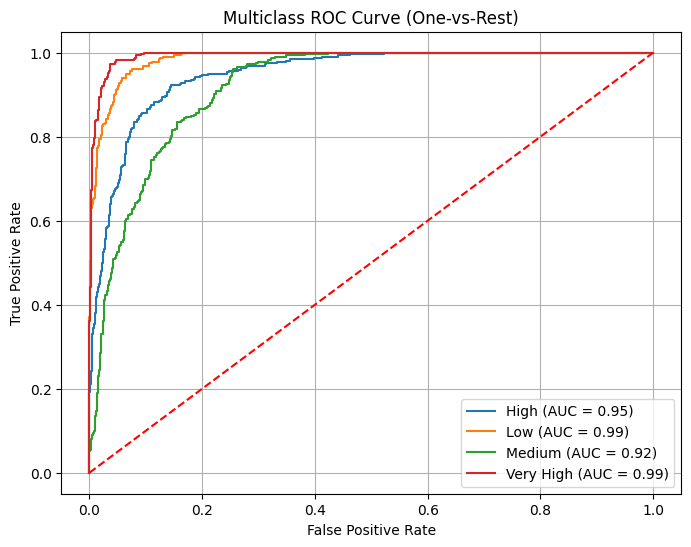

In [25]:
# 8) ROC Curve (One-vs-Rest)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test_scaled)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()

Each curve shows how well the model distinguishes one class from all others.

- The higher the curve, the better the model at identifying that class.

- The AUC (area under the curve) measures how well the class is separated.

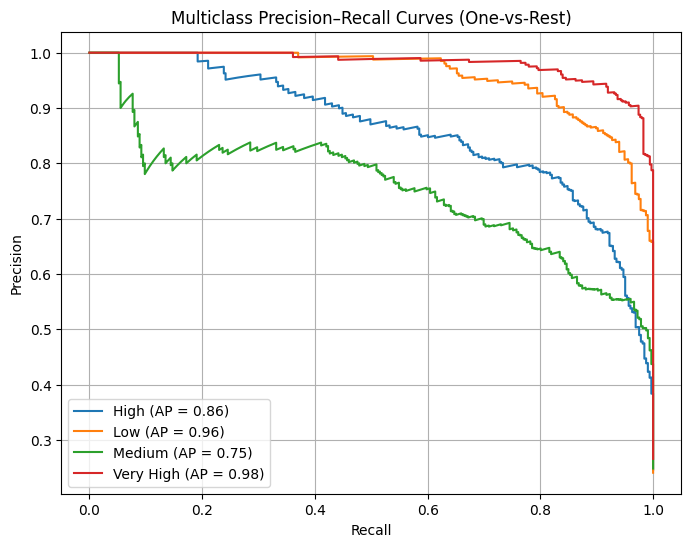

In [26]:
# 9) Precision–Recall Curve (Multiclass)
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8,6))

for i, class_name in enumerate(label_encoder.classes_):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], model.predict_proba(X_test_scaled)[:, i])
    ap = average_precision_score(y_test_bin[:, i], model.predict_proba(X_test_scaled)[:, i])
    plt.plot(recall, precision, label=f"{class_name} (AP = {ap:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multiclass Precision–Recall Curves (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()

- Each curve shows how precision and recall trade off for one class vs all others.

- The area under the curve (AP) is a summary of performance — higher is better.

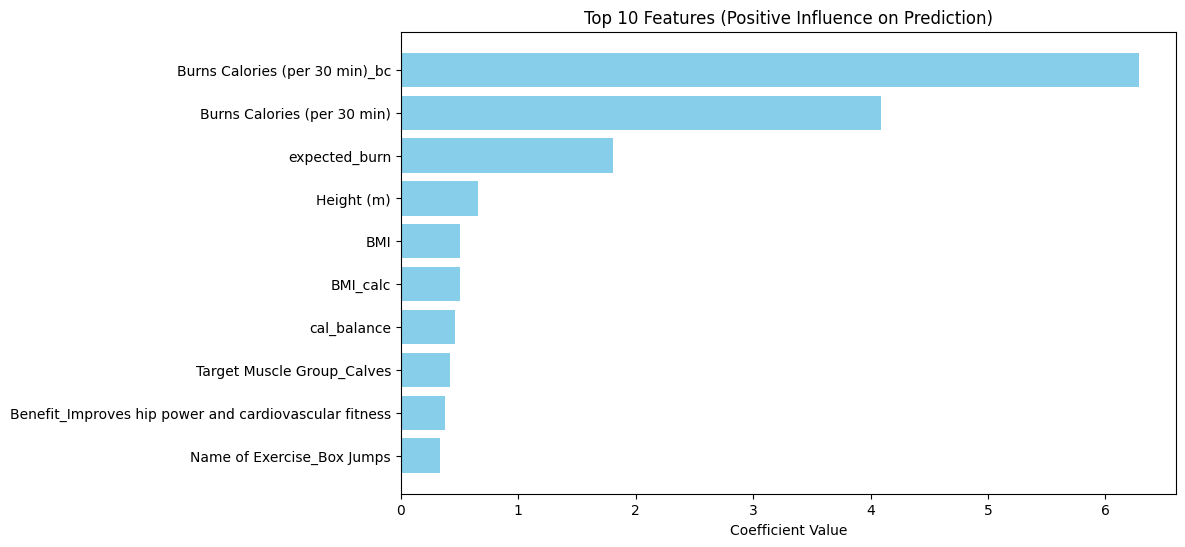

In [27]:
# 10) Feature Importance (Coefficients)
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(coef_df["Feature"].head(10), coef_df["Coefficient"].head(10), color="skyblue")
plt.gca().invert_yaxis()
plt.title("Top 10 Features (Positive Influence on Prediction)")
plt.xlabel("Coefficient Value")
plt.show()